# Getting Started

This notebook demonstrates the OpenSCM Two Layer Model repository's basic functionality.

We start with imports, their need will become clearer throughout the notebook.

In [1]:
import inspect

import numpy as np
from openscm_units import unit_registry
from scmdata import ScmRun

import openscm_twolayermodel
from openscm_twolayermodel import ImpulseResponseModel, TwoLayerModel
from openscm_twolayermodel.base import Model

/Users/znicholls/Documents/AGCEC/MCastle/openscm-twolayermodel/src/openscm_twolayermodel/base.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


As with most Python packages, the version of ``openscm_twolayermodel`` being used can always be checked as shown below. This is very helpful for debugging.

In [2]:
# NBVAL_IGNORE_OUTPUT
openscm_twolayermodel.__version__

'0.1.0+9.g16bd0d8.dirty'

OpenSCM Two Layer Model has two key classes: `ImpulseResponseModel` and `TwoLayerModel`. These are implementations of the two major variants of the two-layer model found in the literature. We can see that they both have a common base class using the `inspect` package.

In [3]:
inspect.getmro(ImpulseResponseModel)

(openscm_twolayermodel.impulse_response_model.ImpulseResponseModel,
 openscm_twolayermodel.base.TwoLayerVariant,
 openscm_twolayermodel.base.Model,
 abc.ABC,
 object)

In [4]:
inspect.getmro(TwoLayerModel)

(openscm_twolayermodel.two_layer_model.TwoLayerModel,
 openscm_twolayermodel.base.TwoLayerVariant,
 openscm_twolayermodel.base.Model,
 abc.ABC,
 object)

These classes can both be used in the same way. We demonstrate the most basic usage here, more comprehensive usage is demonstrated in other notebooks.

The first thing we need is our effective radiative forcing driver. This should be an [`ScmRun`](https://scmdata.readthedocs.io/en/latest/data.html#the-scmrun-class) instance.

In [5]:
run_length = 200

driver = ScmRun(
    data=np.arange(run_length) * 4 / 70,
    index=1850 + np.arange(run_length),
    columns={
        "unit": "W/m^2",
        "model": "idealised",
        "scenario": "1pctCO2",
        "region": "World",
        "variable": "Effective Radiative Forcing",
    }
)
driver

<scmdata.ScmRun (timeseries: 1, timepoints: 200)>
Time:
	Start: 1850-01-01T00:00:00
	End: 2049-01-01T00:00:00
Meta:
	    unit      model scenario region                     variable
	0  W/m^2  idealised  1pctCO2  World  Effective Radiative Forcing

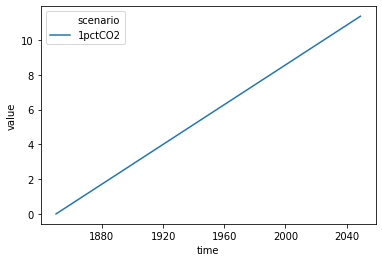

In [6]:
# NBVAL_IGNORE_OUTPUT
driver.lineplot()

Then we can initialise instances of our models and run them.

In [7]:
# NBVAL_IGNORE_OUTPUT
two_layer = TwoLayerModel(lambda0=4 / 3 * unit_registry("W/m^2/delta_degC"))
res_two_layer = two_layer.run_scenarios(driver)

impulse_response = ImpulseResponseModel(d1=10 * unit_registry("yr"))
res_impulse_response = impulse_response.run_scenarios(driver)

res = res_two_layer.append(res_impulse_response)
res.head()

time                                                                                                                                                                                                                                                                                                                                                                                                                  1850-01-01  \
model     scenario region variable                    unit       du (meter) a (watt / delta_degree_Celsius ** 2 / meter ** 2) lambda0 (watt / delta_degree_Celsius / meter ** 2) dl (meter) climate_model                  efficacy (dimensionless) eta (watt / delta_degree_Celsius / meter ** 2) run_idx d1 (a) q1 (delta_degree_Celsius * meter ** 2 / watt) q2 (delta_degree_Celsius * meter ** 2 / watt) d2 (a)               
idealised 1pctCO2  World  Effective Radiative Forcing W/m^2      50.0       0.0                                               1.333333                                           1200.0     two_layer                      1.0                      0.8                                            0       NaN    NaN                                           NaN                                           NaN            0.0   
                          Surface Temperature|Upper   delta_degC 50.0       0.0                                               1.333333                                           1200.0     two_layer                      1.0                      0.8                                            0       NaN    NaN                                           NaN                                           NaN            0.0   
                          Surface Temperature|Lower   delta_degC 50.0       0.0                                               1.333333                                           1200.0     two_layer                      1.0                      0.8                                            0       NaN    NaN                                           NaN                                           NaN            0.0   
                          Heat Uptake                 W/m^2      50.0       0.0                                               1.333333                                           1200.0     two_layer                      1.0                      0.8                                            0       NaN    NaN                                           NaN                                           NaN            0.0   
                          Effective Radiative Forcing W/m^2      NaN        NaN                                               NaN                                                NaN        two_timescale_impulse_response 1.0                      NaN                                            0       10.0   0.3                                           0.4                                           400.0          0.0   

time                                                                                                                                                                                                                                                                                                                                                                                                                  1851-01-01  \
model     scenario region variable                    unit       du (meter) a (watt / delta_degree_Celsius ** 2 / meter ** 2) lambda0 (watt / delta_degree_Celsius / meter ** 2) dl (meter) climate_model                  efficacy (dimensionless) eta (watt / delta_degree_Celsius / meter ** 2) run_idx d1 (a) q1 (delta_degree_Celsius * meter ** 2 / watt) q2 (delta_degree_Celsius * meter ** 2 / watt) d2 (a)               
idealised 1pctCO2  World  Effective Radiative Forcing W/m^2      50.0       0.0                                               1.333333                                           1200.0     two_layer                      

Now we can plot our outputs and compare (of course, we can make these two models the same if we're clever about how we set the parameters, see the impulse response equivalence notebook).

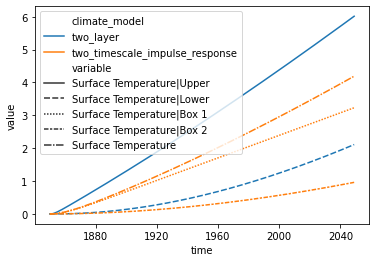

In [8]:
# NBVAL_IGNORE_OUTPUT
res.filter(variable="Surface Temperature*").lineplot(hue="climate_model", style="variable")

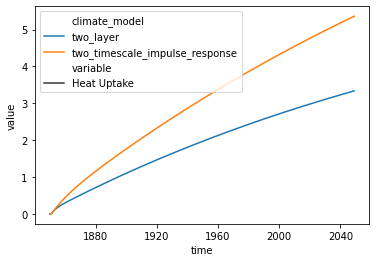

In [9]:
# NBVAL_IGNORE_OUTPUT
res.filter(variable="Heat*").lineplot(hue="climate_model", style="variable")